# Week 5



## The plan for today

We continue exploring data and learning about dataviz. The lecture today has 4 parts.
* In part 1, there is more lecturing.
* In part 2, we talk about exploring data with two variables - we read a bit more.
* In part 3, it's a short one about logarithmic plots.
* And finally, in part 4, we have fun with linear regression.

Ok. Now it's time to get started.


## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

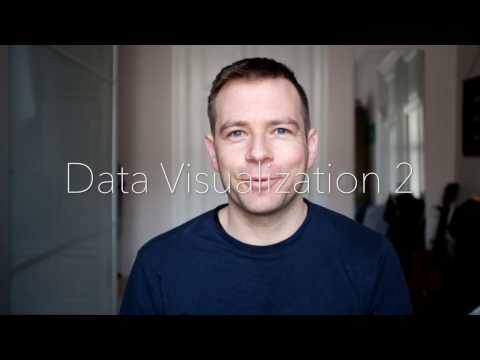

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zE6Nr8trdrw",width=800, height=450)

> Excercise: Some questions for the video
>
> * Mention 10 examples of ways we can encode data
> * Are all encoding created equally? Why not?
> * Explain in your own words: What is the problem with pie-charts?
> * Mention three encodings that are difficult for the human eye to parse? Can you find an example of a visualization online that uses one of those three?
> * What is a "Choropleth"? What does the ancient Greek root of that word "χῶρος" mean?

**Bonus video**: Just to provide another perspective on data visualization (which covers many of the topics I've discussed over the past few weeks but from new angles), below is a great talk about data visualization by David McCandless. This one is optional, but recommended.

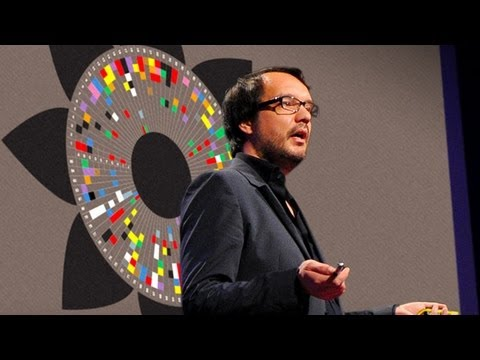

In [7]:
# David McCandless TED talk (this one is optional)
YouTubeVideo("5Zg-C8AAIGg",width=800, height=450)

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. This time, we'll read Chapter 3, which is about visualizing data with two variables. 

*Reading*: [DAOST Chapter 3](https://cn.inside.dtu.dk/cnnet/filesharing/download/3e8a79e2-e0e6-4a76-bc56-304c906c166d) up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF.

And now a few exercises to reflect on the text:

*Exercises:* DAOST chapter 3

 > * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a Nature article from 2004 get it [here](https://github.com/suneman/socialdataanalysis2018/blob/master/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What kind of relationships will a semi-log plot help you discover?
> * What kind of functions will loglog plots help you see?
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * I think figure 3-14 makes an important point about linear fits that is rarely made. What is it? 
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

## Part 3: Logarithmic plots

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise*: Logarithms and plots

> * First, we'll simply create a version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/categories.png) from Lecture 1, where you display the $y$-axis on log-scale.
> * Let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in san francisco. Let's see if I'm right. 
>   - Step 1: Divide San Francisco into a grid roughly $100m$ \times $100m$.
>   - Step 2: Count the number of thefts occurring within each grid-square (use all data for all time).
>   - Step 3: Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>   - Step 4: Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - Step 5: Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - Step 6: Answer the question: Was Sune correct in assuming that there is a power-law distribution of theft?

## Part 4: Linear regression

So now it's time for fun with standard linear regression. We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

If we look at 14 focus crimes that results in
$$\frac{14\times13}{2}=91$$

pairwise comparisons. So we can display them all in a $7$ by $13$ matrix of plots. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.

*Exercise*:
> Create the 91 scatterplots.
> * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
> * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

Next it's time for the linear regression. Janert writes about this on page 63-66.

Figuring out how to find the best fit is a nice little problem, and I'm in the mood to revisit how to solve it, so I'll actually derive the solution below. 

(***Important* public service announcement**: You don't really need to know how this is done, so the derivation *can safely be skipped*, and you can just jump to the final equations, and start your coding. But if you (like me), are in the mood for revisiting a cute little problem from the past, you might be entertained by the next few parts).

### Setting up the problem

Ok. So first, let's introduce some [nomenclature](https://www.merriam-webster.com/dictionary/nomenclature). We want to fit a line of the form $y = ax + b$, where $a$ is the slope and $b$ is the $y$-intercept. 

<img src="https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/sketch1.png" alt="drawing" width="650"/>

Here, the line is shown in red, and we've also given names to all our data. There are $N$ points, and point $i$ has coordinates $(x_i,y_i)$.

### So what is it we want to optimize?

Now we can think about how we actually implement the best possible fit. We won't just do something *ad hoc* like moving the line around until it looks good. Here, we want to use the power of math to make sure that we actually find the best fit. 

A promising concept to make the best fit something practical is the *residuals*. For some $x_i$, the residual is the difference between the actual value $y_i$ and the value of the line in that point $ax_i+b$. On the plot the differences look like this (with residuals illustrated in green)

<img src="https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/sketch3.png" alt="drawing" width="650"/>

Below the plot, I've also sketched the size of the residuals. (Note the connection of the little inset to DAOST Figure 3-5.)

**So if we can make the residuals as small as possible, we will find a good fit**. But how do we do that?

### The sum of squares
Basically the idea is that we want to minimize some function of all the residuals that takes into account their sizes. We can't just add them in a big sum, since they're both positive and negative. If we did that, we would end up with a small sum, as long as we had a roughly equal number of positive/negative residuals.

Another candidate for a function that you might come up with now (especially if you think like a programmer), involve minimizing the sum of absolute values of residuals. That might actually work well, but it's non-trivial to work with absolute values from the perspective of the mathematics ([plus there are other good reasons to follow a different route](https://math.stackexchange.com/questions/967883/why-get-the-sum-of-squares-instead-of-the-sum-of-absolute-values) as we do below).

In fact, a lovely way to make sure the residuals are positive, is to simply *square them*. Minimizing the sum of squares also minimizes the sum of absolute values. So now we're good to go. If we call the sum of squares $Q$, the thing we want to make as small as possible is

$$Q = \sum_{i=1}^N \left(y_i - (ax + b) \right)^2$$.

**But how the h#ll do we do that?** Is it time for gradient descent or some numerical optimization like that?

Most of the time, when we're finding optima of complicated functions, the answer is yes, but in this simple case, the answer is no. 

Because this is a beautiful and simple problem, we can find an analytical solution using relatively simple methods. (And the happy memory of learning about *that*, is why I felt like going over the solution today ... although I'm starting to regret it a bit ... since it's a lot of work explain all this 🥴🤪).

But there's no point in stopping now. So let's do it!

### Minimizing the sum of squares
How do we find the minimum of something without coding? Now, you have to think *all the way back* to when you did your high school math. (Ah, those were the days, right.)

And yes, you're right. $Q$ will be minimized at the values of $a$ and $b$ for which $\partial Q / \partial a = 0$ and $\partial Q / \partial b = 0$. So we can simply find those.

We start with the $y$-intecept, $b$. Now, we find that by setting the derivative wrt. $b$ equal to zero

$$
\frac{ \partial Q } {\partial b} = \sum_{i=1}^N -2 \left(y_i - b - ax_i\right)=
2\left(N b + a \sum_{i=1}^Nx_i - \sum_{i=1}^Ny_i\right) = 0.
$$

We can reorganize this to give us a nice interpretation of $b$

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

**Equation (1) is what you will need later on**, but it's useless without an expression for the slope $a$, so let's find that.

This time we get

$$
\frac{ \partial Q } {\partial a} = \sum_{i=1}^N -2x_i \left(y_i - b - ax_i\right)=
\sum_{i=1}^N -2\left(x_iy_i - bx_i - ax_i^2\right) = 0.
$$

We now substitute our solution for $b$ into this equation to yield
$$
\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle + ax_i\langle x \rangle -  a x_i^2   \right) = 0.
$$

And we can split this bad-boy into two sums to give us

$$
\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle\right) - 
a\sum_{i=1}^N \left(x_i^2 - x_i\langle x \rangle \right) = 0,
$$

where we can isolate $a$ to give us a **final expression for the slope, shown below in Equation (2).**

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i - x_i \langle y\rangle\right)}{\sum_{i=1}^N \left(x_i^2 - x_i\langle x \rangle \right)}=
\frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$
Aaaand we're done. 

***Important summary information:*** To use my ramblings above for something constructive, simply start by calculating Equation (2), then plug your answer into Equation (1) and you'll have the best fit line. That means we can now get going with the actual exercises.

*Exercise*:
> Using the formulas we derived above, add a linear fit to each of the 91 scatterplots.

### Goodness of fit as a measure of correlation

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measurea of how good a linear fit is. I think I've derived enough things from scratch today, so I'll spare you that, instead [**go read about $R^2$ on wikipedia**](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* 
> * Write a little function to calculate $R^2$ alongside each linear fit.
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the most **dis**similar temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the (Pearson correlation coefficient)[https://en.wikipedia.org/wiki/Pearson_correlation_coefficient].
> * And speaking of correlations. In your words, explain the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient)? How is it different for the Pearson correlation?